<a href="https://colab.research.google.com/github/harishmuh/machine_learning_practices/blob/main/Multiple_Linear_Regression_Tips_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `Multiple Linear Regression`
---

### `Linear Regression concept`

`Linear regression`
* Linear regression is a fundamental statistical and machine learning technique used to model the relationship between a dependent variable (target) and one or more independent variables (features).
* Multiple Linear Regression is an extension of simple linear regression. While simple linear regression uses one independent variable to predict a dependent variable. multiple linear regression uses two or more independent variables.

`Multiple Linear Regression Formula`

The general form of a multiple linear regression model is:

$$
y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \cdots + \beta_nx_n + \varepsilon
$$

Where:

- y = Dependent (response) variable  
- x1, x2, ..., xn = Independent (predictor) variables  
- β0​ = intercept
- β1, β2, ..., βn = Coefficients for each predictor  
- ε = Error term

### `Business Problem Understanding`

**Problem Statement**

Because tip amounts vary, determining an appropriate tip is crucial for employee well-being.

**Goals**

Determine the appropriate tip amount for each customer.

**Analytic Approach**

So, what we need to do is analyze the data to find patterns in the existing features that differentiate one customer from another.

Next, we will build a regression model that will help the company provide a tip prediction tool for new customers, which will be useful for improving employee well-being.

**Metric Evaluation**

The evaluation metrics that will be used are MSE and RMSE. The smaller the value of these two, the more accurate the model is in predicting tip prices according to the limitations of the features used.

Furthermore, we can also calculate the R-squared or adj. R-squared value to determine how well the model can represent the overall variance of the data. The closer it is to 1, the better the model fits the observed data. However, this metric is not valid for non-linear models.

`Initial Setup`

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

import warnings
warnings.filterwarnings("ignore")

### `Data Understanding`

In [2]:
# Looking for dataset name in seaborn
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

**Initial Assesment**

In [3]:
data = sns.load_dataset('tips')

display(data.head())

print(f'''
Number of rows: {data.shape[0]}
Number of columns: {data.shape[1]}
      ''')



,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4



Number of rows: 244
Number of columns: 7
      


In [4]:
# data summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
# Check the data type, null values, and unique values ​​of each column
pd.DataFrame({
  'feature': data.columns.values,
  'data_type': data.dtypes.values,
  'missing values': data.isna().mean().values * 100,
  'negative': [True if data[col].dtype == int and (data[col] < 0).any() else False for col in data.columns],
  'n_unique': data.nunique().values,
  'sample_unique': [data[col].unique() for col in data.columns]
})

,feature,data_type,missing values,negative,n_unique,sample_unique
0,total_bill,float64,0.0,False,229,"[16.99, 10.34, 21.01, 23.68, 24.59, 25.29, 8.7..."
1,tip,float64,0.0,False,123,"[1.01, 1.66, 3.5, 3.31, 3.61, 4.71, 2.0, 3.12,..."
2,sex,category,0.0,False,2,"['Female', 'Male'] Categories (2, object): ['M..."
3,smoker,category,0.0,False,2,"['No', 'Yes'] Categories (2, object): ['Yes', ..."
4,day,category,0.0,False,4,"['Sun', 'Sat', 'Thur', 'Fri'] Categories (4, o..."
5,time,category,0.0,False,2,"['Dinner', 'Lunch'] Categories (2, object): ['..."
6,size,int64,0.0,False,6,"[2, 3, 4, 1, 6, 5]"


In [6]:
# descriptive statistic
display(data.describe(), data.describe(include='category'))

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


**Insight**

* The dataset consists of 243 rows and 7 columns.
* Numeric variables: total bill, tip, and size
* Categorical variables: sex, smoker, day, and time
* There are no missing values ​​in the data.

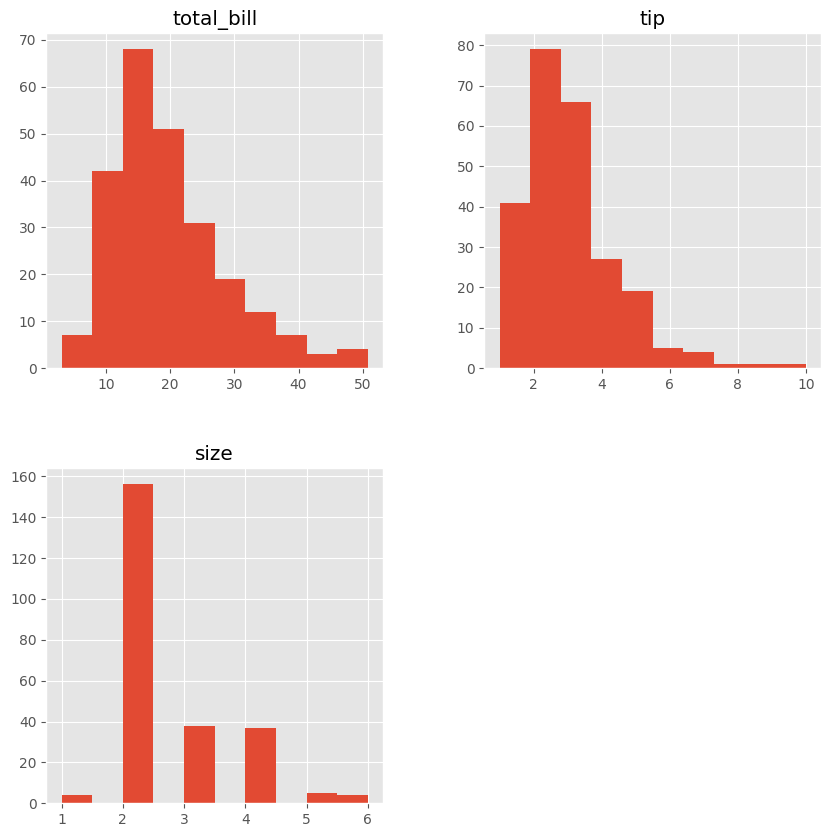

In [7]:
# data distribution # graphical summary # Univariate Analysis
data.hist(figsize=(10, 10), bins=10)
plt.show()

In [8]:
# Numerical and categorical features
num_cols = [col for col in data.columns if data[col].dtype != 'category']
cat_cols = [col for col in data.columns if data[col].dtype == 'category']

# Create tables to display numerical and categorical columns
numerical_df = pd.DataFrame({'numerical': num_cols})
categorical_df = pd.DataFrame({'categorical': cat_cols})

print("Numerical Columns:")
display(numerical_df)

print("\nCategorical Columns:")
display(categorical_df)

Numerical Columns:


,numerical
0,total_bill
1,tip
2,size



Categorical Columns:


,categorical
0,sex
1,smoker
2,day
3,time


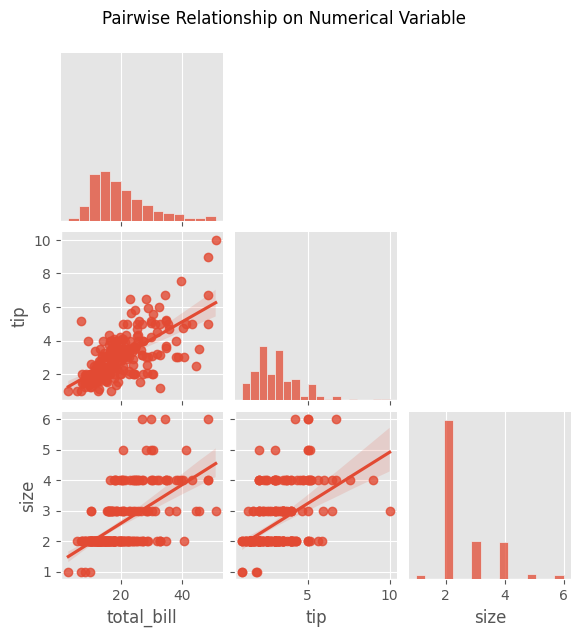

In [9]:
# Pair plot relationship
graph = sns.pairplot(data[num_cols],corner=True,kind='reg',height=2)
graph.fig.suptitle('Pairwise Relationship on Numerical Variable',y=1.05)
plt.show()

**Insight**

* The tip and total bill variables are continuous, while size is discrete.
* The relationship between the tip and total bill variables forms a linear pattern.
* The frequency of sizes 2, 3, and 4 is higher than that of the other sizes.

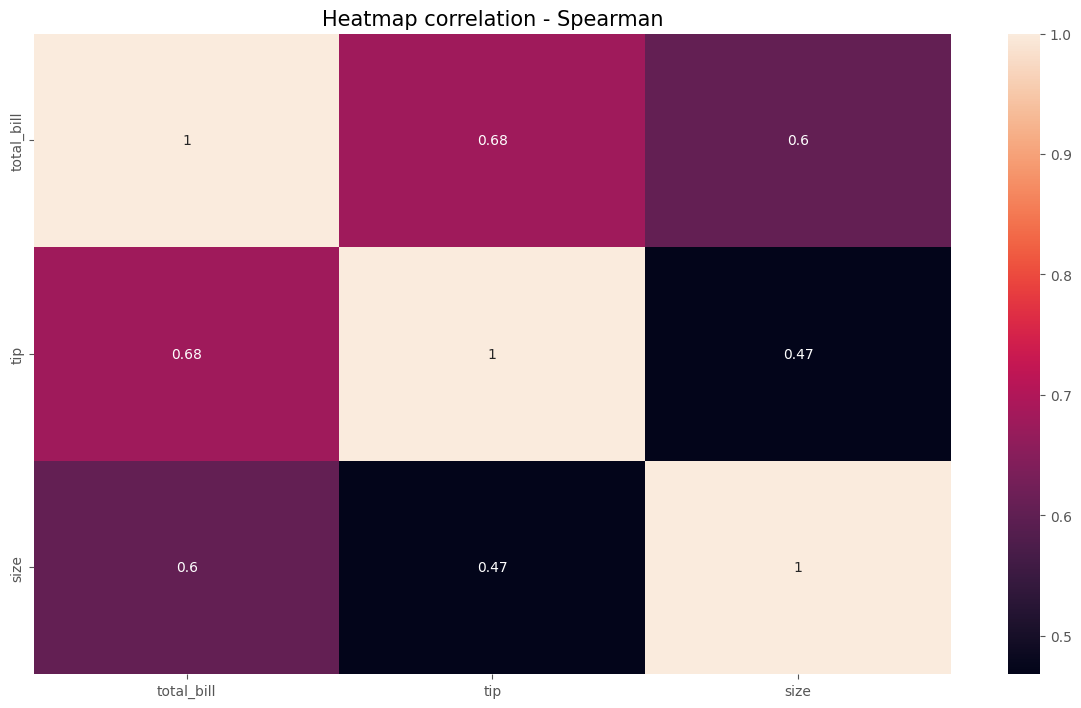

In [10]:
# Heatmap Correlation
plt.figure(figsize=(12,7))
sns.heatmap(data.select_dtypes(include=['int','float']).corr(method= 'spearman'), annot=True)
plt.tight_layout()
plt.title('Heatmap correlation - Spearman', fontsize=15)
plt.show()

**Bivariate analysis**

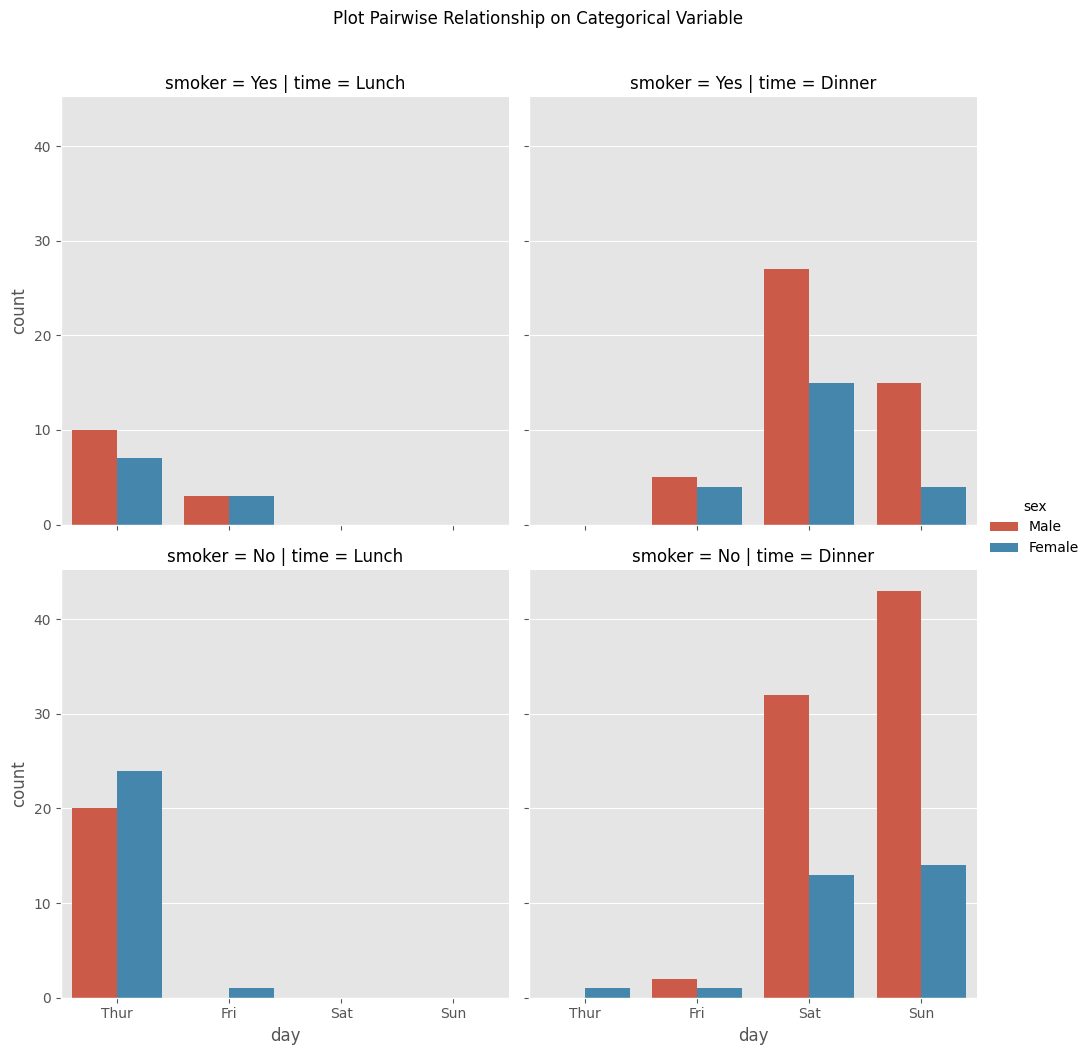

In [11]:
# Categorical columns # Bivariate analysis
graph = sns.catplot(data[cat_cols],x='day', hue='sex', row='smoker',col='time', kind='count')
graph.fig.suptitle('Plot Pairwise Relationship on Categorical Variable',y=1.05)
plt.show()

**Insight**

* There are more male customers than female customers.
* Customers prefer dinner on weekends (Saturday and Sunday) and lunch on weekdays (Thursday and Friday).
* There is a significant decrease in customers on Fridays.
* Most customers are active smokers.

We can also answer some questions based on our data.

Q1 : What is the hardest day to work ? (based on number of tables been served)

In [12]:
data.groupby('day').count()

,total_bill,tip,sex,smoker,time,size
day,,,,,,
Thur,62,62,62,62,62,62
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76


The highest number of meal server is on the saturday

Q2: Lets find out what is the best day to work – maximum tips (sum and percents)

In [13]:
data2 = data.groupby('day')[['total_bill', 'tip']].sum() # sum per day
data2['percent'] = data2['tip']/data2['total_bill']*100 # add percents
display(data2)

,total_bill,tip,percent
day,,,
Thur,1096.33,171.83,15.673201
Fri,325.88,51.96,15.944519
Sat,1778.40,260.40,14.642375
Sun,1627.16,247.39,15.203791


we can see that the tips are around 15% of the bill.

Q3: Lets group by day and table size

In [14]:
data_3= data.groupby(['day','size'])[['total_bill', 'tip']].sum()
data_3['percent'] = data_3['tip']/data_3['total_bill']*100
data_3.dropna() # drop null rows

total_bill     tip    percent
day  size                               
Thur 1          10.07    1.83  18.172790
     2         727.53  117.24  16.114799
     3          76.64   10.77  14.052714
     4         149.75   21.09  14.083472
     5          41.19    5.00  12.138869
     6          91.15   15.90  17.443774
Fri  1           8.58    1.92  22.377622
     2         261.15   42.31  16.201417
     3          15.98    3.00  18.773467
     4          40.17    4.73  11.774956
Sat  1          10.32    2.00  19.379845
     2         892.37  133.43  14.952318
     3         459.17   68.36  14.887732
     4         388.39   53.61  13.803136
     5          28.15    3.00  10.657194
Sun  2         684.84  109.86  16.041703
     3         332.76   46.81  14.067196
     4         480.39   73.58  15.316722
     5          81.00   12.14  14.987654
     6          48.17    5.00  10.379905

### `Data Preparation`

**Handling duplicate**

In [15]:
# duplicated data check
print('Number of row with duplicates:', data.duplicated().sum())

# show duplicate rows (if any)
display(data[data.duplicated()])

Number of row with duplicates: 1


,total_bill,tip,sex,smoker,day,time,size
202,13.0,2.0,Female,Yes,Thur,Lunch,2


In [16]:
# Drop duplicates (keep first occurrence by default)
data = data.drop_duplicates().reset_index(drop=True) # reset index (keeps DataFrame tidy)

print("Shape after:", data.shape)

Shape after: (243, 7)


**Data Wrangling**

**Rare label handling**

 Rare labels were found in the `size` column. Some categories appear dominantly, while others only appear in a small portion of the data. Using rare labels can add noise, leading to overfitting the model.

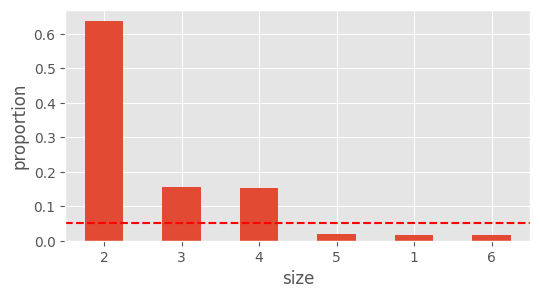

In [17]:
# Size data distribution
tem_df = data['size'].value_counts(normalize=True)

plt.figure(figsize=(6,3))
fig = tem_df.plot.bar(rot=0)
fig.set_xlabel('size')
fig.set_ylabel('proportion')

plt.axhline(y=0.05, color='red', linestyle='--')
plt.show()

**Insight**

* Sizes 2, 3, and 4 appear more than 10% of the time, while the rest appear less frequently. Labels 1, 5, and 6 are rare labels.
* Size 2 dominates the frequency of the other sizes, accounting for around 60%.

We will regroup the size categories into Single/couple and Group

In [18]:
# Converting value
def group_size(x):
    if x < 2:
        return 'Single/couple'
    else:
        return 'Group'

data['size'] = data['size'].apply(group_size)
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,Group
1,10.34,1.66,Male,No,Sun,Dinner,Group
2,21.01,3.50,Male,No,Sun,Dinner,Group
3,23.68,3.31,Male,No,Sun,Dinner,Group
4,24.59,3.61,Female,No,Sun,Dinner,Group


**Outlier handling**

An outlier is a data point that differs significantly from the rest of the data. Linear models, especially linear regression, are sensitive to outliers. Therefore, we need to detect and handle outliers.

First, try detecting and quantifying outliers univariately.

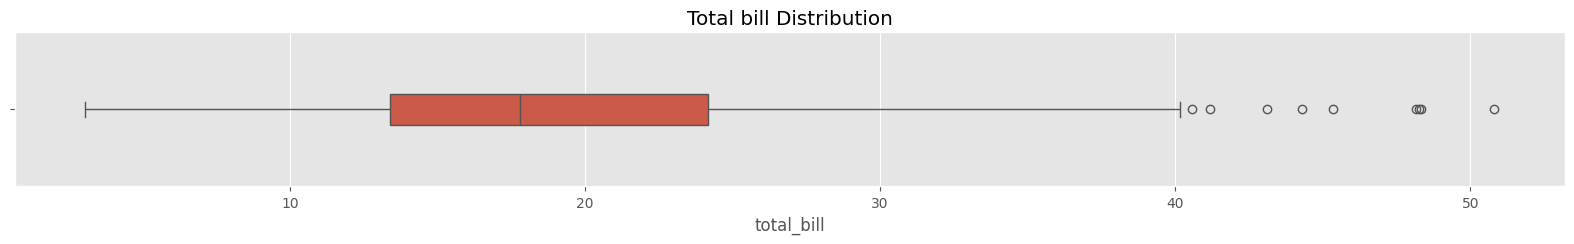

In [19]:
# Boxplot to detect outliers
fig, ax = plt.subplots(figsize=(20,2))


sns.boxplot(x='total_bill', data=data,width=0.2)
plt.title('Total bill Distribution')
plt.show()

In [20]:
# Calculating the percentage of outlier
def n_outlier(data):
    q1, q3 = data.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower = q1 - iqr * 1.5
    upper = q3 + iqr * 1.5

    n = len(data)
    n_upper = len(np.where(data > upper)[0])/n
    n_lower = len(np.where(data < lower)[0])/n
    print(f'Percentage: {round((n_upper + n_lower)*100, 2)}')
    return lower, upper

lower, upper = n_outlier(data['total_bill'])

Percentage: 3.7


The percentage of outliers is small (<5%) so it can be ignored.

**Insight**

* The distribution of the total_bill variable is asymmetrical, suggesting a non-normal distribution.
* The skewness of total_bill is more right-skewed or positive.
* Based on the IQR limits, approximately 3.7% are identified as outliers.

**Feature selection**

In [21]:
# Selecting data
df = data.copy()

# Define target and features
y = df['tip']
X = df.drop(columns='tip')

**Feature Engineering**

* Convert categorical variables to numeric values ​​using encoding.

In [22]:
# Categorical encoding using pd.get_dummies()
X = pd.get_dummies(data=X, columns=['sex', 'smoker', 'day', 'time', 'size'], dtype=int, drop_first=True)
X.head()

,total_bill,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner,size_Single/couple
0,16.99,1,1,0,0,1,1,0
1,10.34,0,1,0,0,1,1,0
2,21.01,0,1,0,0,1,1,0
3,23.68,0,1,0,0,1,1,0
4,24.59,1,1,0,0,1,1,0


**Multicolinearity check**

In [23]:
def calculate_vif(X):
    # Convert boolean columns to integer
    X = X.astype(int)
    vif = pd.DataFrame()
    vif['feature'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X,i) for i in range(len(X.columns))]
    return vif.sort_values('VIF',ascending=False)

calculate_vif(X)

,feature,VIF
6,time_Dinner,33.471273
4,day_Sat,17.836096
5,day_Sun,15.686460
0,total_bill,3.663360
3,day_Fri,2.586851
2,smoker_No,2.233104
1,sex_Female,1.463706
7,size_Single/couple,1.072790


Since the VIF for the time_Dinner feature is > 10, we will try to drop the time_Dinner column.

In [24]:
calculate_vif(X.drop(columns=['time_Dinner', 'day_Sat', 'day_Sun']))

,feature,VIF
0,total_bill,2.149402
2,smoker_No,2.059056
1,sex_Female,1.446409
3,day_Fri,1.102469
4,size_Single/couple,1.039842


In [25]:
X = X.drop(columns=['time_Dinner', 'day_Sat', 'day_Sun'])
X = sm.add_constant(X.astype(float))

**Data Splitting**

Divide the dataset into train and test sets with a composition of 80:20.

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

print('data train:', X_train.shape)
print('data test:', X_test.shape)

data train: (194, 6)
data test: (49, 6)


### `Modeling`

**Simple Linear Regression**

In [27]:
simLinreg = sm.OLS(y_train, X_train[['const','total_bill']])
simpleR_result = simLinreg.fit()
print(simpleR_result.summary().tables[0])
print(simpleR_result.summary().tables[1])

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     178.0
Date:                Wed, 10 Sep 2025   Prob (F-statistic):           3.65e-29
Time:                        04:34:51   Log-Likelihood:                -278.97
No. Observations:                 194   AIC:                             561.9
Df Residuals:                     192   BIC:                             568.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8870      0.175      5.068      0.0

**Linear Regression Model summary**

Linear Regression Equation
*  y = 0.887 + 0.107 * X
* tip^​ = 0.887 + 0.107 * total_bill

R-squared = 0.481

* About 48.1% of the variance in tip can be explained by the total bill.

* The other ~51.9% is explained by other factors

F-statistic = 178.0, Prob (F-statistic) < 0.001

* The overall regression model is statistically significant.

* Means that total_bill significantly helps explain the variability in tips.

Coefficients Table

* Intercept (const) = 0.887

  * When total_bill = 0, the model predicts an average tip of USD 0.887.

* Slope (total_bill) = 0.107

  * For each USD 1 increase in the total bill, the tip increases by USD 0.107 on average.

  * Example: if the bill is $20 higher, the tip is predicted to be about USD 2.14 higher.

* Both coefficients are statistically significant (p < 0.001).

Confidence Intervals

* For total_bill: [0.092, 0.123], We are 95% confident that the true effect of each extra dollar on the bill is between 9.2 cents and 12.3 cents in tips.

In [28]:
# Calculating error
y_pred = simpleR_result.predict(X_test[['const','total_bill']])

print(f'MSE: {mean_squared_error(y_test,y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))}')

MSE: 1.047715173258703
RMSE: 1.0235795881409042


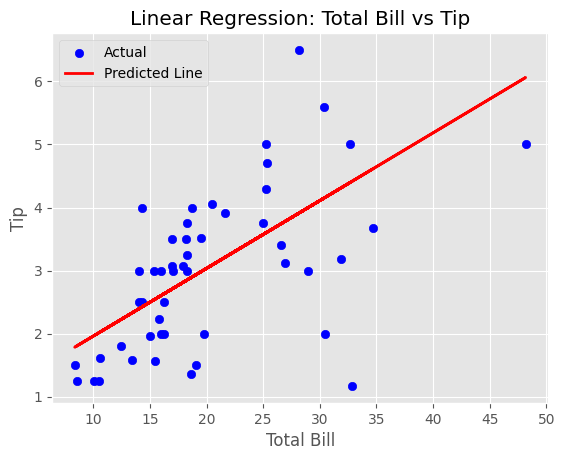

In [29]:
# Visualization
plt.scatter(X_test['total_bill'], y_test, color="blue", label="Actual")
plt.plot(X_test['total_bill'], y_pred, color="red", linewidth=2, label="Predicted Line")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Linear Regression: Total Bill vs Tip")
plt.legend()
plt.show()

**Multiple Linear Regression**

In [30]:
multiple = sm.OLS(y_train, X_train)
multipleR_result = multiple.fit()
print(multipleR_result.summary().tables[0])
print(multipleR_result.summary().tables[1])

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     36.22
Date:                Wed, 10 Sep 2025   Prob (F-statistic):           7.03e-26
Time:                        04:34:52   Log-Likelihood:                -277.17
No. Observations:                 194   AIC:                             566.3
Df Residuals:                     188   BIC:                             585.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.7344      0

**Multiple regression model summary**

Multiple Regression Equation
* y = 0.734 + 0.108⋅x1 − 0.087⋅x2 + 0.268⋅x3 + 0.225⋅x4 − 0.201⋅x5
* tip^ = 0.734 + 0.108⋅total_bill − 0.087⋅sex_Female + 0.268⋅smoker_No + 0.225⋅day_Fri − 0.201⋅size_Single/couple

R-squared = 0.491

* About 49.1% of the variation in tips is explained by the predictors: total_bill, sex, smoker, day, and size.

* Slightly better than the simple regression model (0.481 → 0.491), but not a big jump.

Adjusted R-squared = 0.477

* Adjusts for the number of predictors.

* The model still explains about 47.7% of tip variation, meaning additional variables did not add much explanatory power.

F-statistic = 36.22, Prob (F-statistic) < 0.001

* The overall regression model is statistically significant.

* At least one predictor is meaningfully related to tips.

**Coefficient interpretation**

Intercept (0.734, p < 0.01)

* Baseline predicted tip when all predictors are at reference values.

* (Male, smoker, Sat/Sun, group size > 2, bill = USD 0 → predicted tip = USD 0.73).

Total_bill (0.1076, p < 0.001)

* Strongly significant.For every USD 1 increase in the bill, tip increases by USD 0.108 on average (holding other variables constant).

* This matches the simple regression result → total_bill is the strongest driver.

Sex_Female (-0.087, p = 0.579)

* Not statistically significant. Suggests that, after controlling for other variables, being female is associated with slightly lower tips (~9 cents less), but this effect is not reliable.

Smoker_No (0.268, p = 0.091)

* Marginal effect (not significant at 5%, but borderline at 10%).

* Non-smokers may tip about 27 cents more than smokers, holding other variables constant.

Day_Fri (0.225, p = 0.447)

* Not significant. Being Friday (vs Sat/Sun) is associated with slightly higher tips (~23 cents), but effect is weak.

Size_Single/couple (-0.201, p = 0.707)

* Not significant. Suggests single/couple parties tip 20 cents less than larger groups, but no evidence this is a real effect.

In [31]:
y_pred = multipleR_result.predict(X_test)

print(f'MSE: {mean_squared_error(y_test,y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))}')

MSE: 1.1196802815436677
RMSE: 1.0581494608719828


**Overall Performance Comparison**

After performing predictions on the test set, the cumulative performance of multiple linear regression was slightly better than linear regression. Furthermore, we can see in the multiple linear regression table that the features sex_Female, day_Fri and size_Single/couple have P>|t| values ​​greater than 0.05, indicating that these features do not have a significant effect. In term of error, multiple linear regression resulted in slightly higher MSE and RMSE than the simple linear regression.

### `Conclusion`

* Bill size (total_bill) is the strongest and most consistent predictor of tips.

* The model suggests that customers tip about 11 cents per $1 spent.

* Adding other variables (sex, smoker, day, size) does not improve the model much → they are not statistically significant.

* The model explains about 48–49% of tip variation, leaving ~50% unexplained (likely due to unmeasured factors like service quality, customer mood, or cultural tipping habits).

### `Recommendation`

For model improvement

* If possible, add features that are more correlated with the target ('tips'). As the Current predictors beyond total_bill do not add much value, future models should test new features.

* We may collect additional variables (e.g., service rating, payment method, time of day) to capture more of the unexplained variation.

* If possible to add more data, we can try using a more complex model, such as a recursive neural network (RNN). However, if the amount of data and features remains the same as in this dataset, it likely won't significantly change the results.

For Business improvement

* Focus on increasing total bill size (upselling drinks, desserts, sides), since higher bills directly lead to higher tips.

* Training staff on upselling strategies may indirectly increase their earnings.

